In [11]:
import argparse
import time
import numpy
import torch
import utils

import tensorboard

from gym_minigrid.wrappers import FullyObsWrapper

In [12]:
env_s = 'MiniGrid-Empty-8x8-v0'
model_s = 'Empty'


In [13]:
gif = 'test'
argmax = False
memory = False
text = False
episodes = 1
shift = 0
pause = 0.1

Device: cpu

Environment loaded

model dir = storage/Empty
Obs size is: 64
Agent loaded



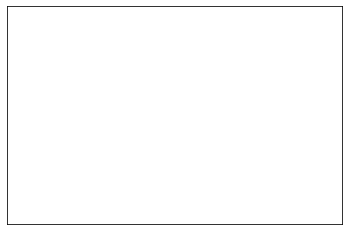

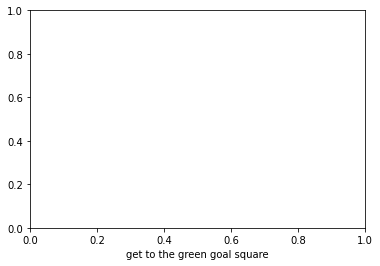

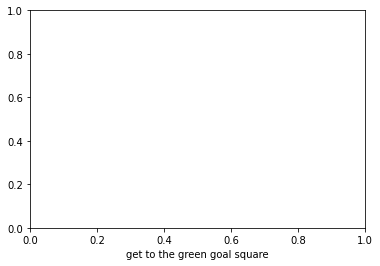

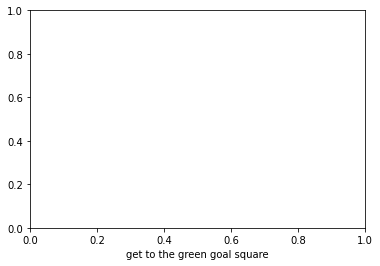

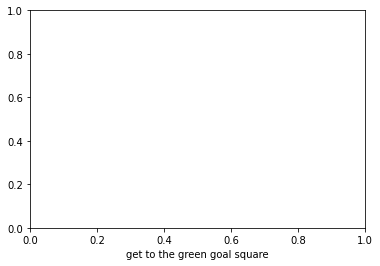

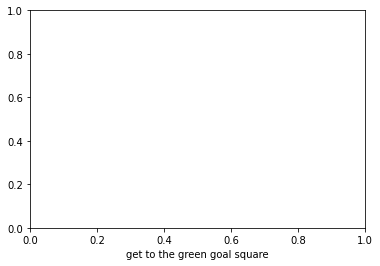

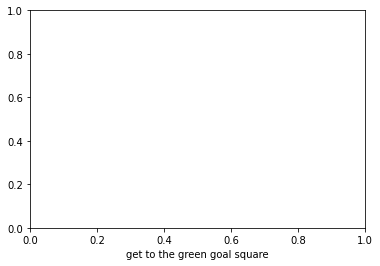

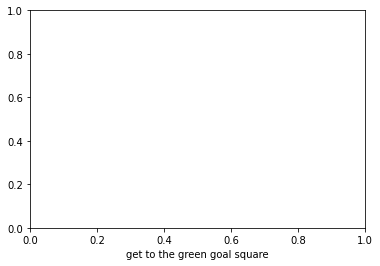

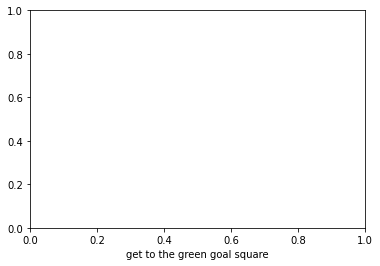

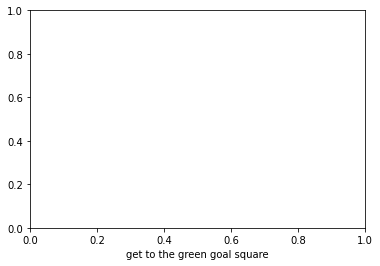

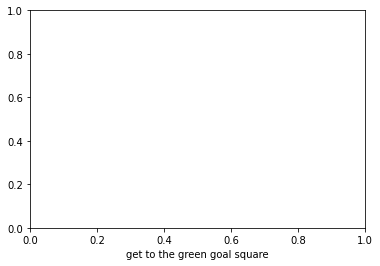

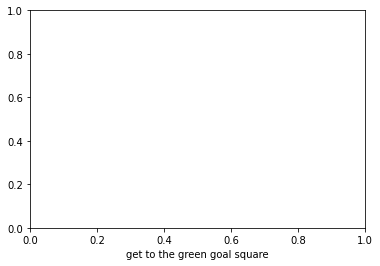

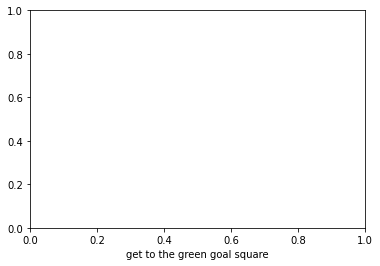

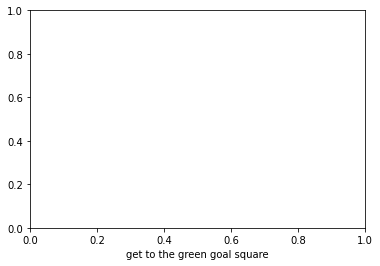

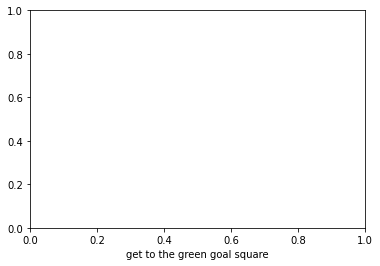

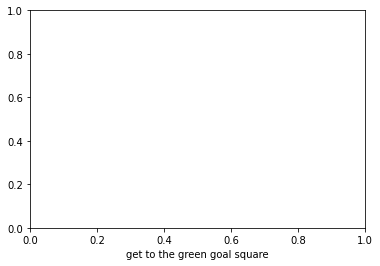

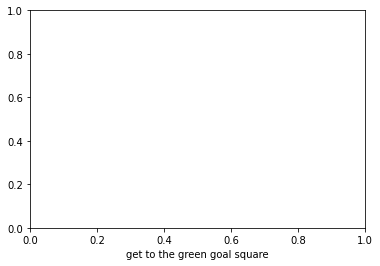

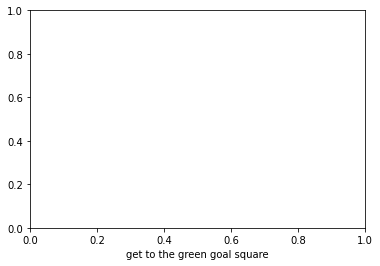

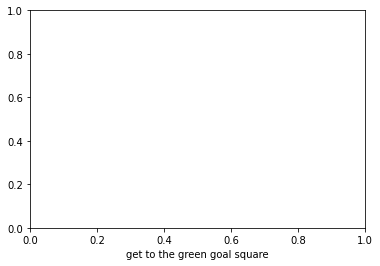

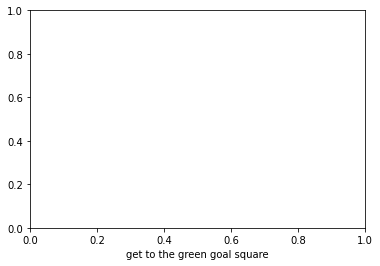

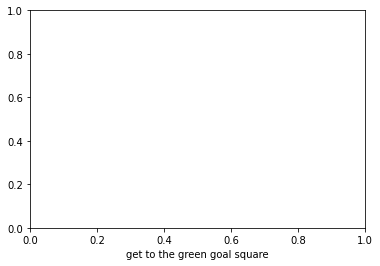

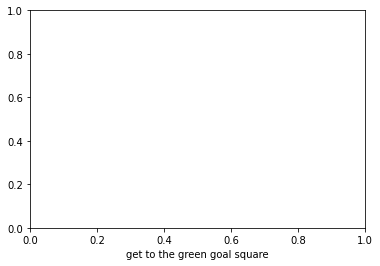

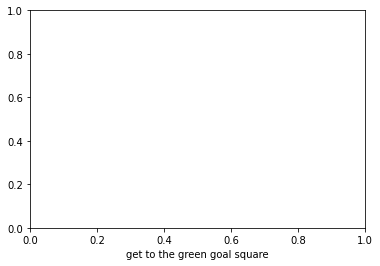

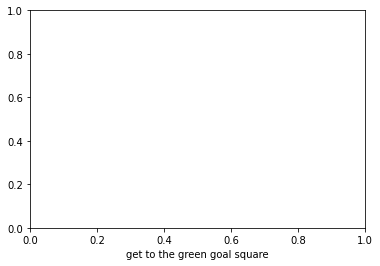

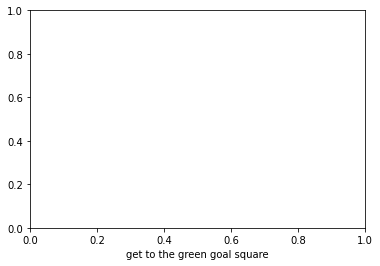

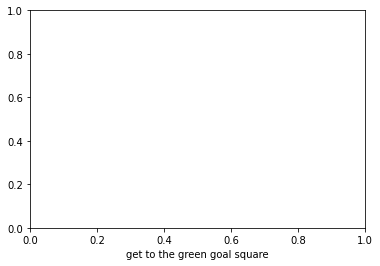

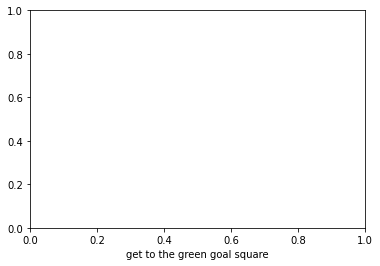

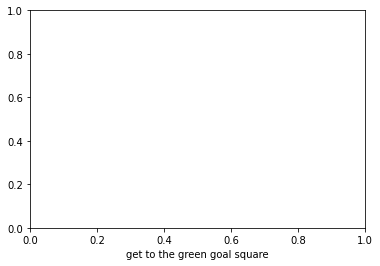

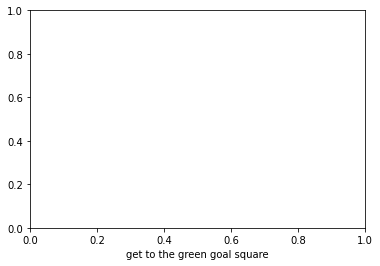

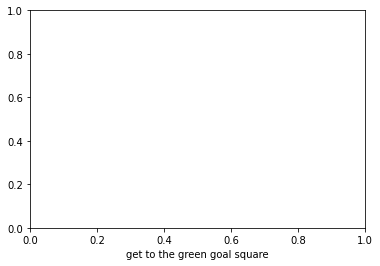

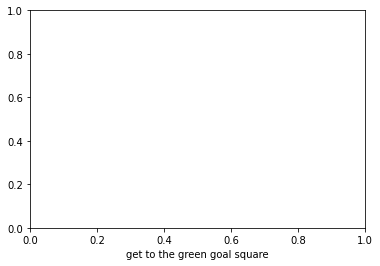

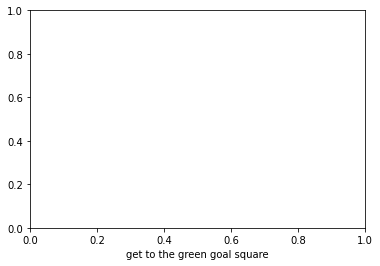

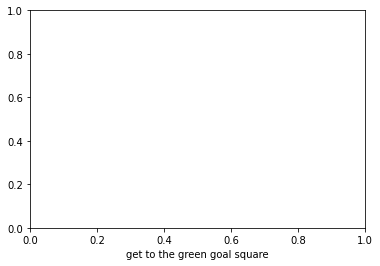

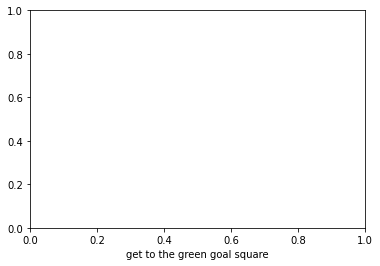

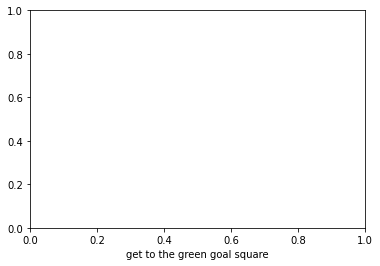

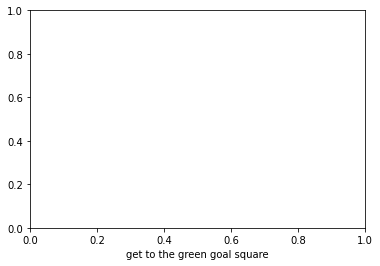

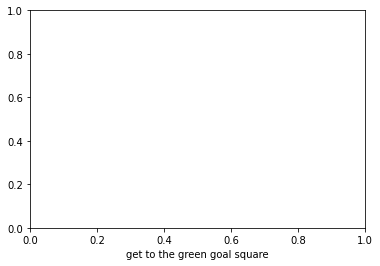

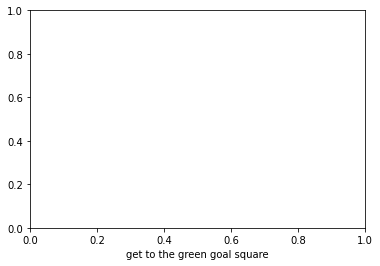

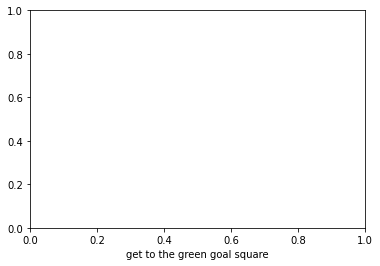

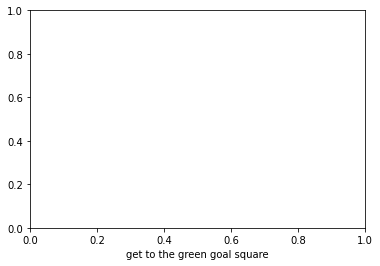

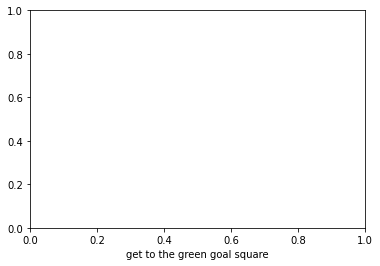

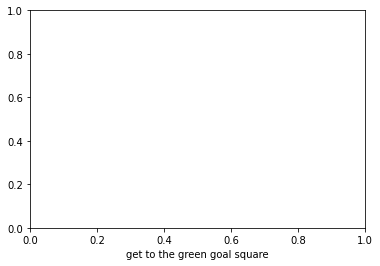

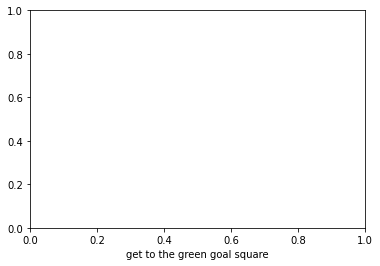

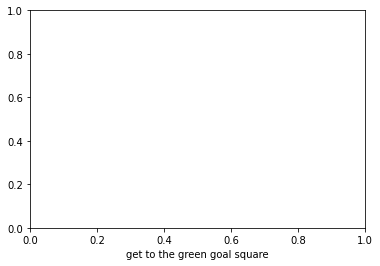

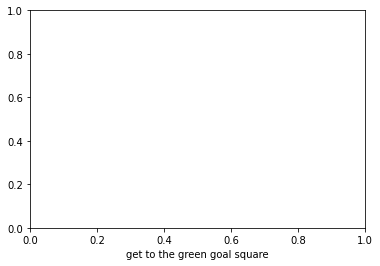

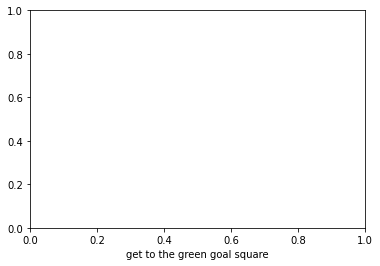

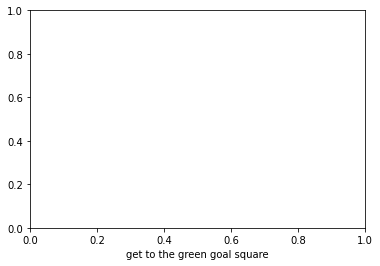

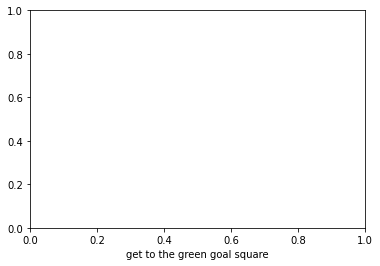

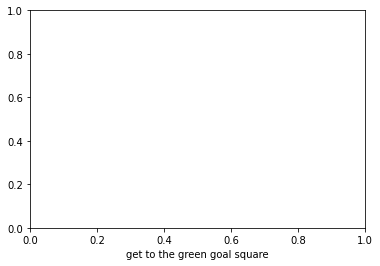

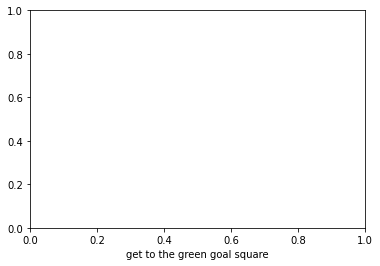

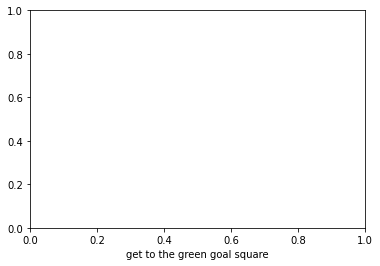

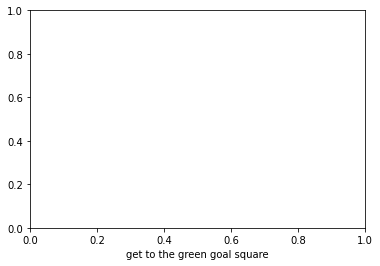

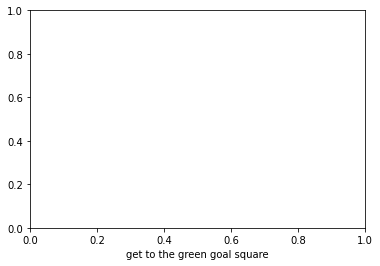

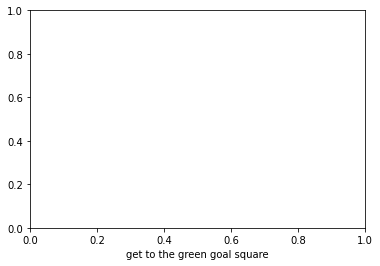

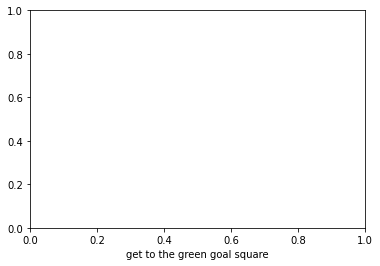

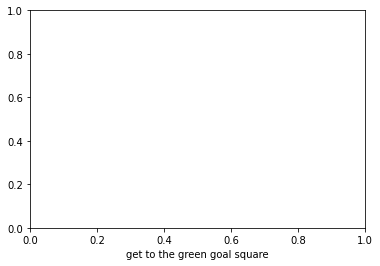

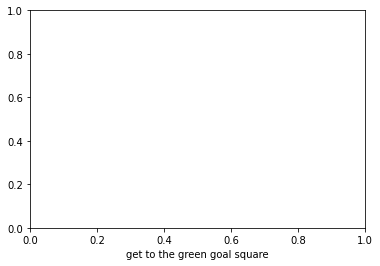

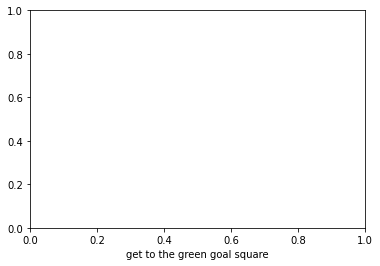

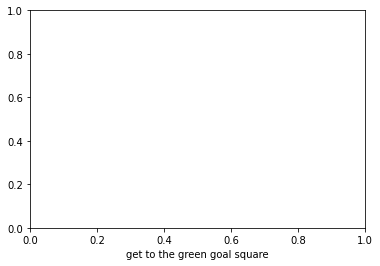

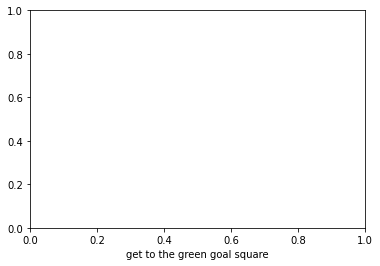

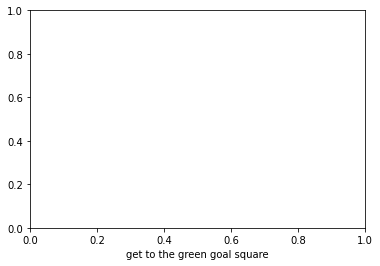

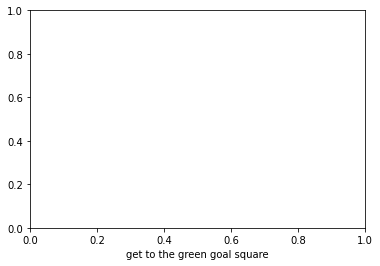

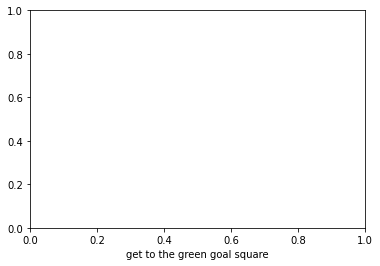

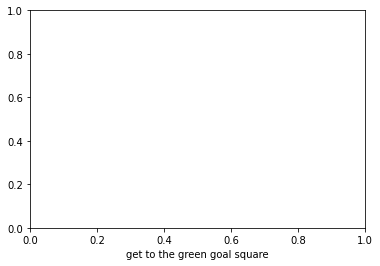

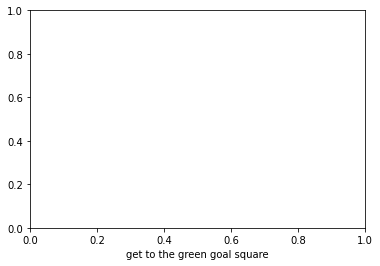

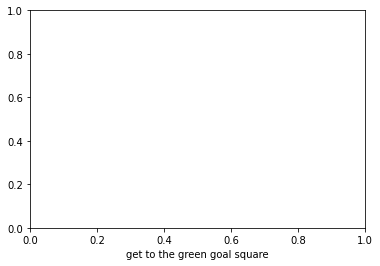

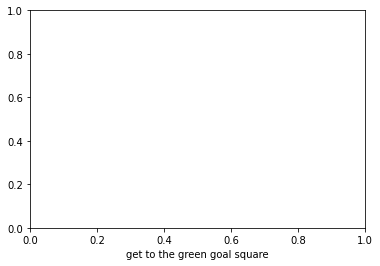

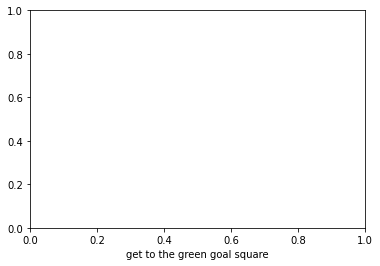

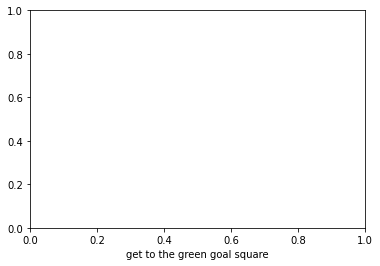

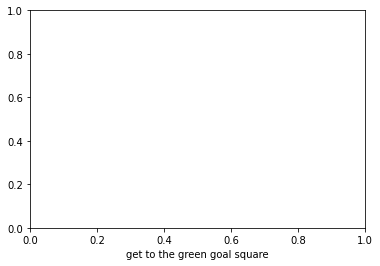

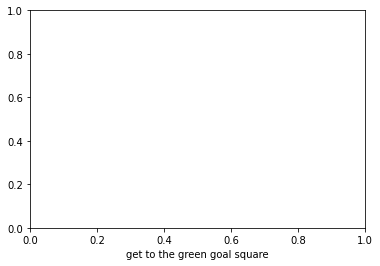

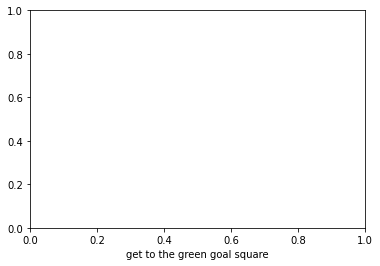

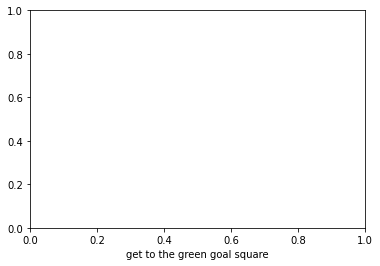

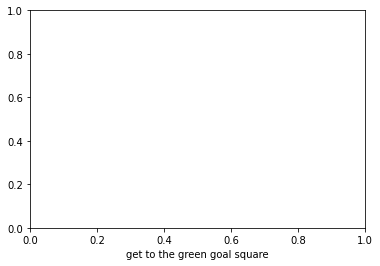

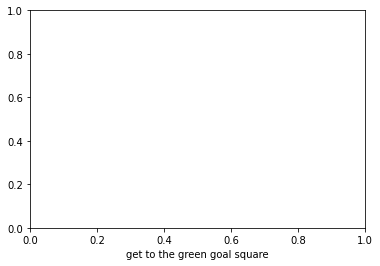

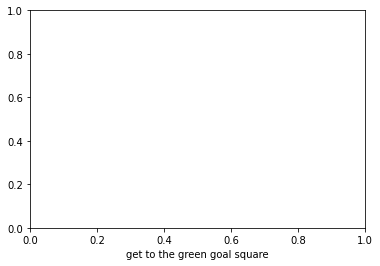

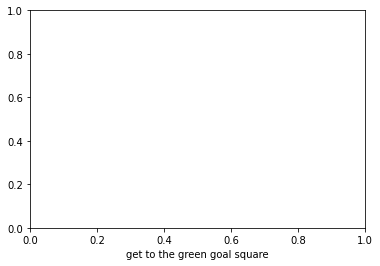

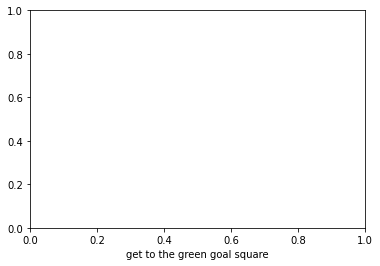

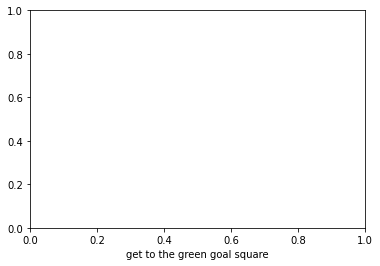

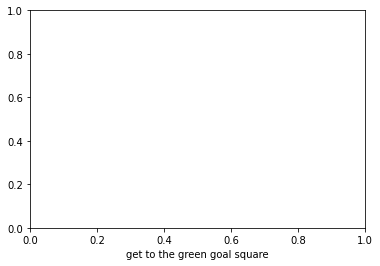

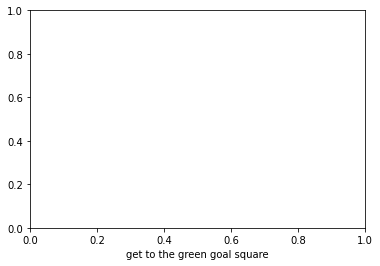

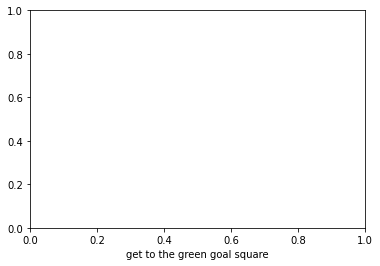

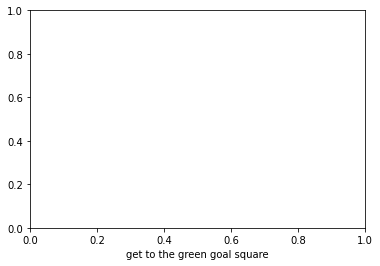

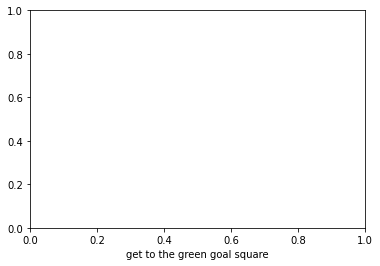

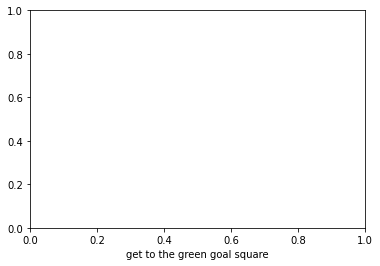

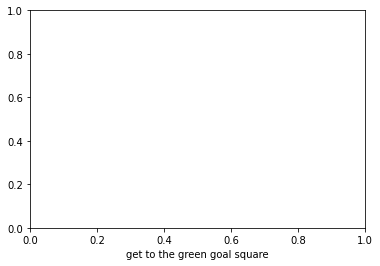

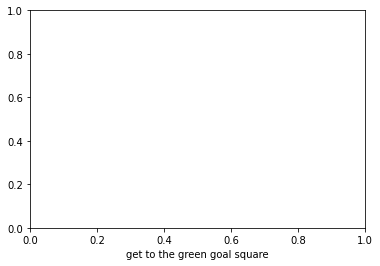

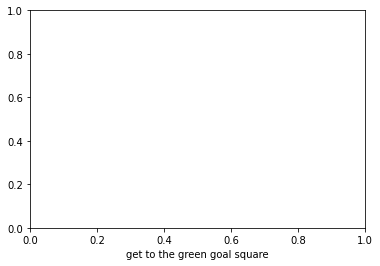

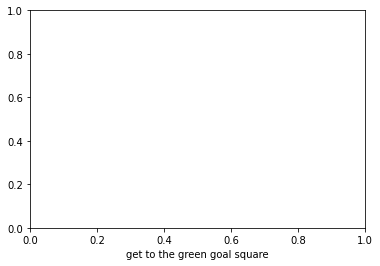

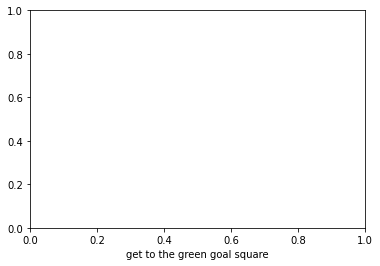

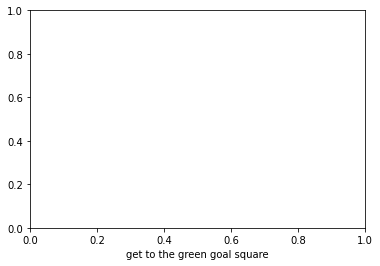

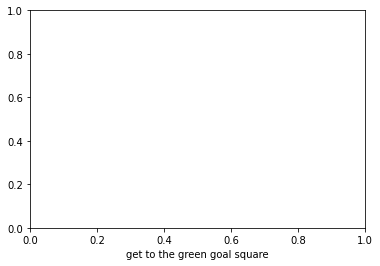

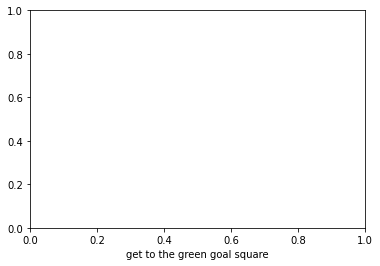

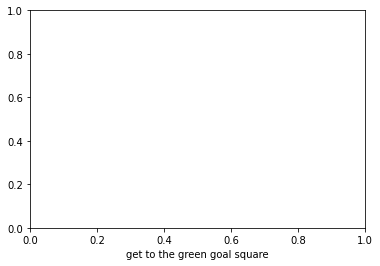

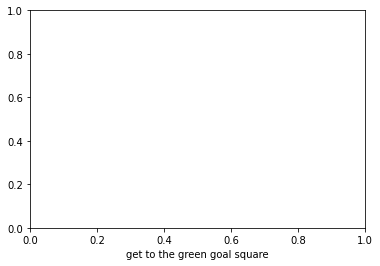

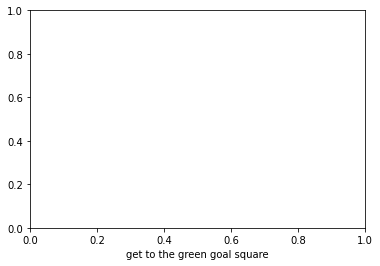

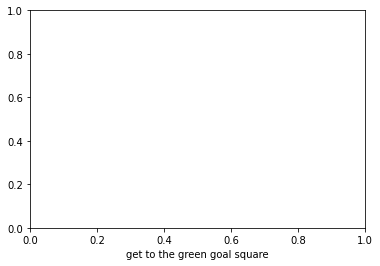

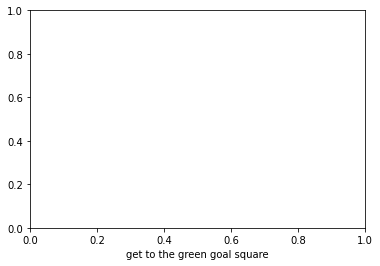

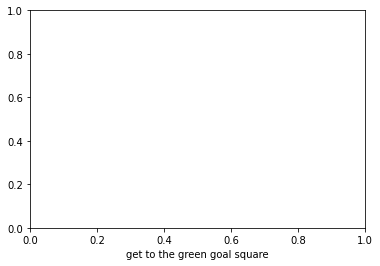

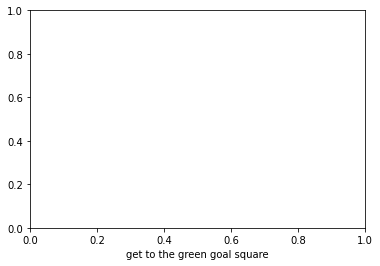

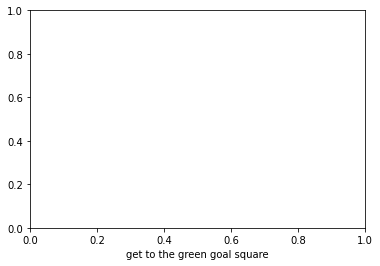

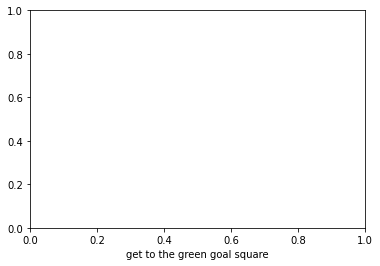

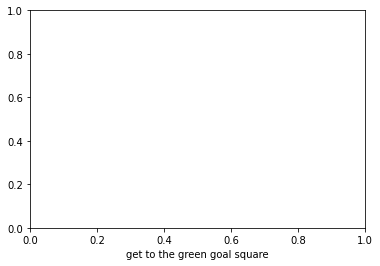

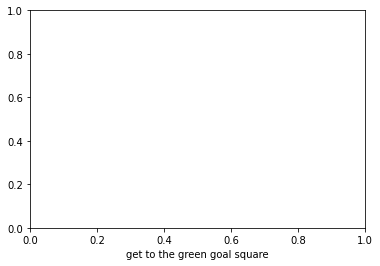

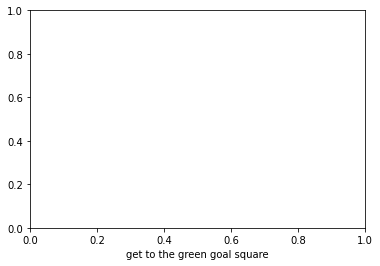

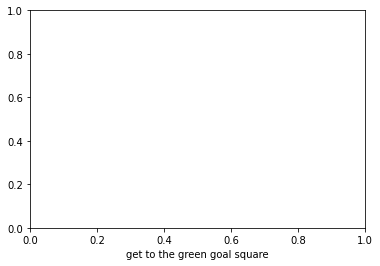

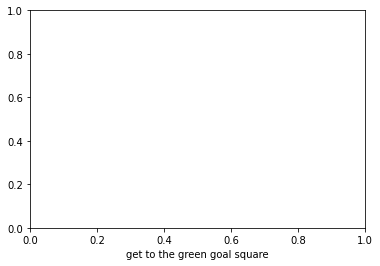

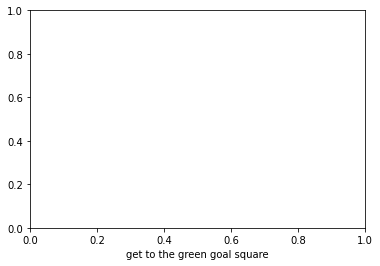

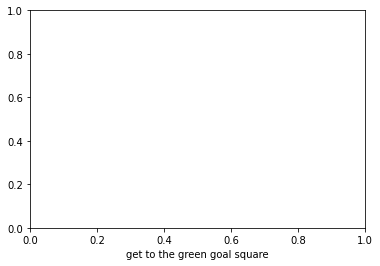

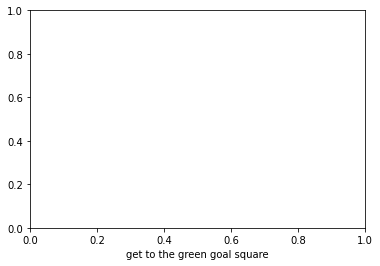

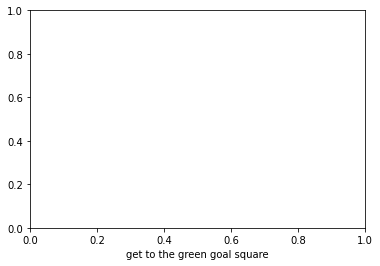

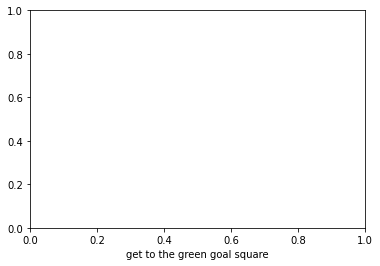

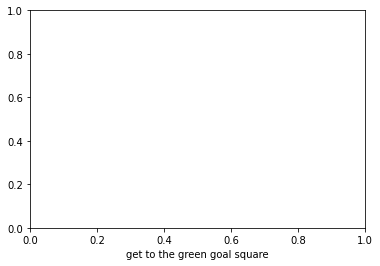

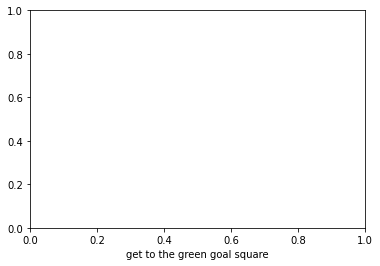

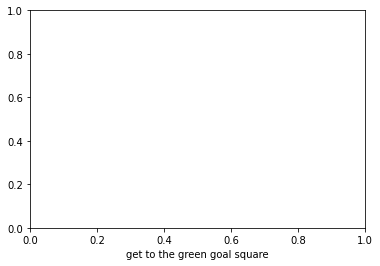

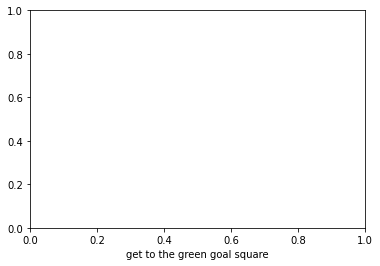

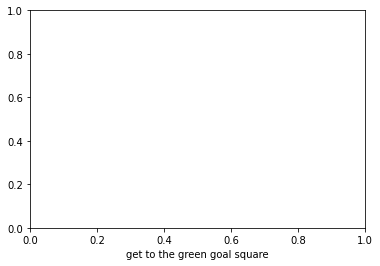

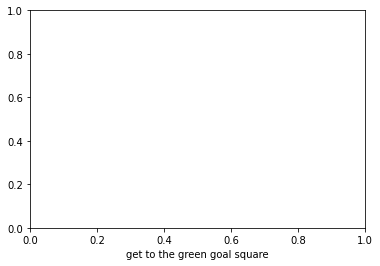

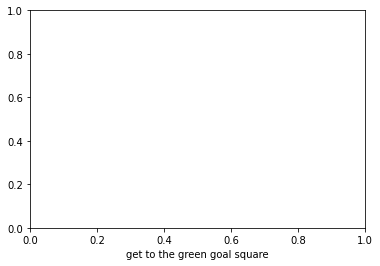

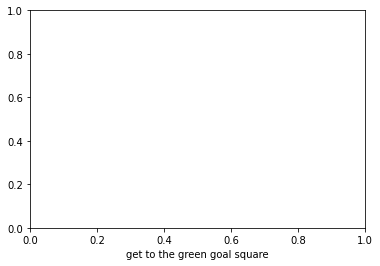

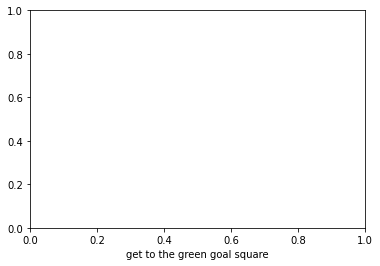

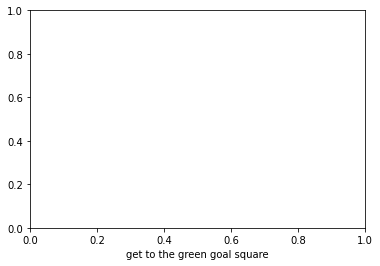

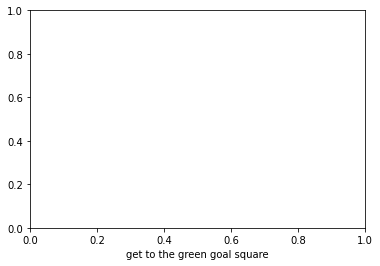

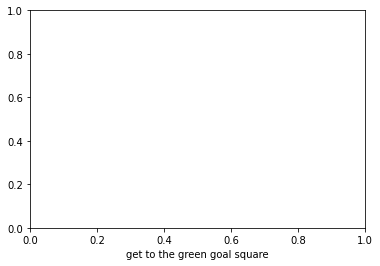

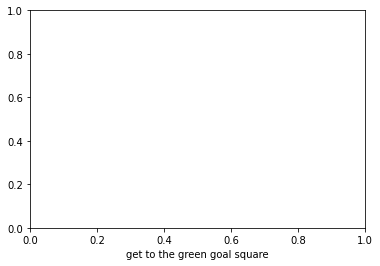

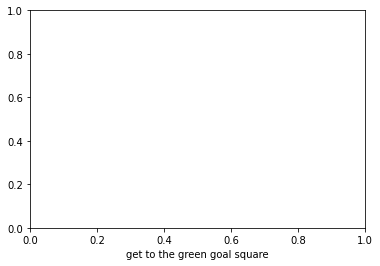

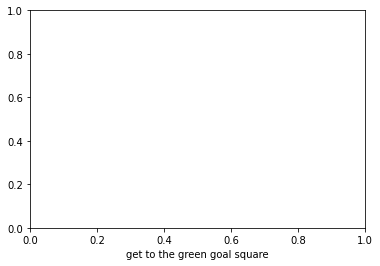

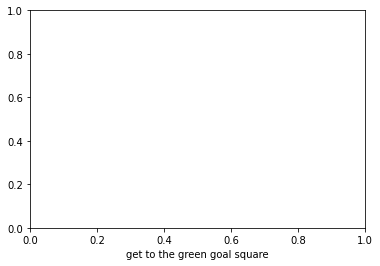

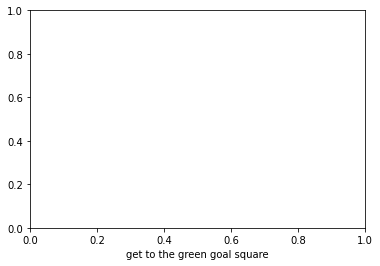

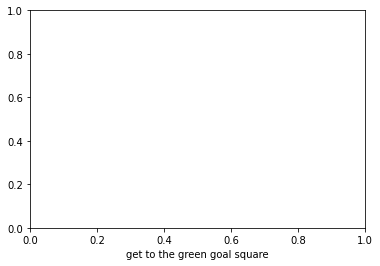

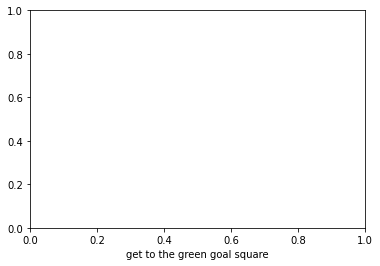

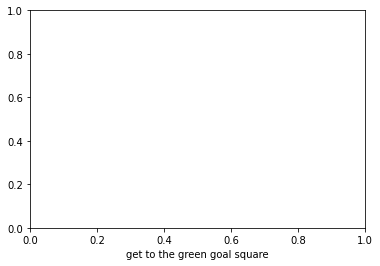

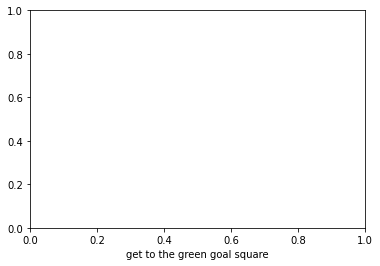

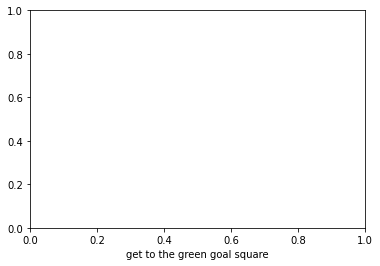

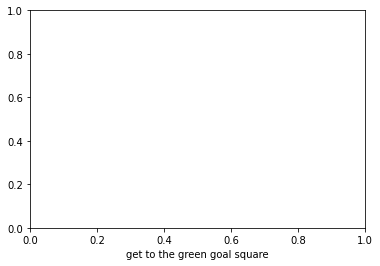

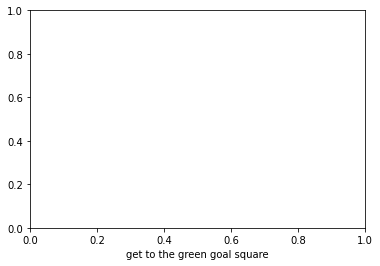

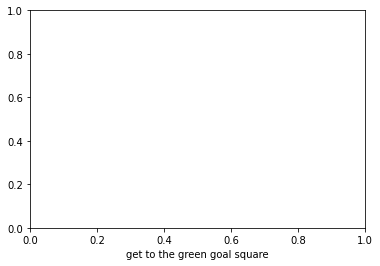

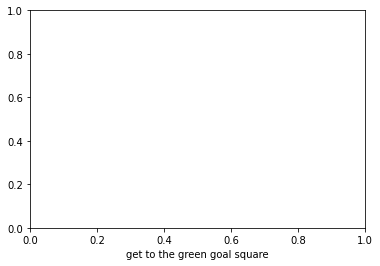

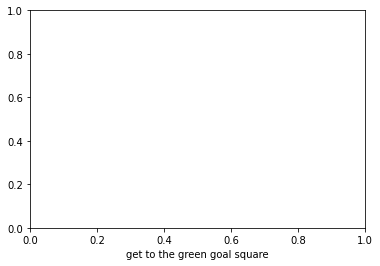

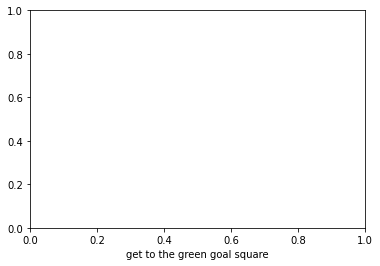

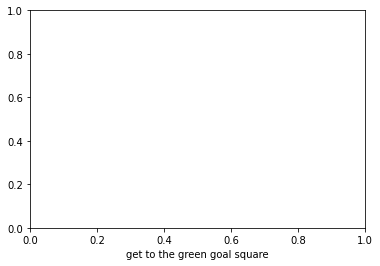

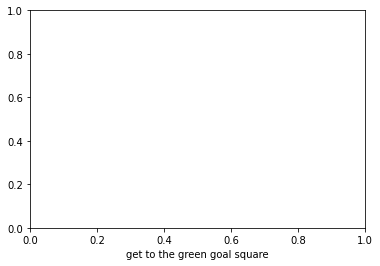

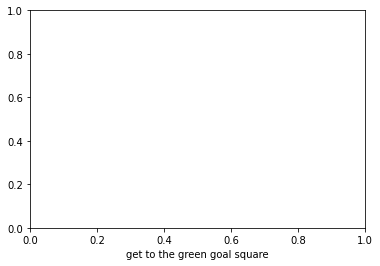

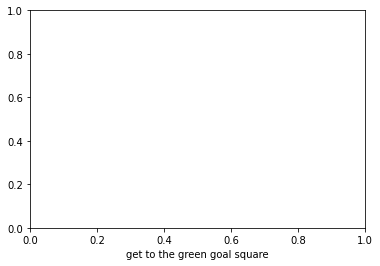

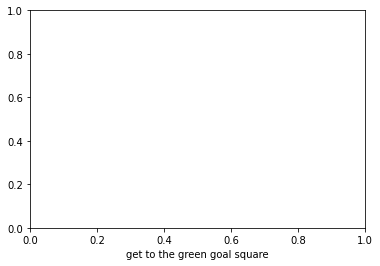

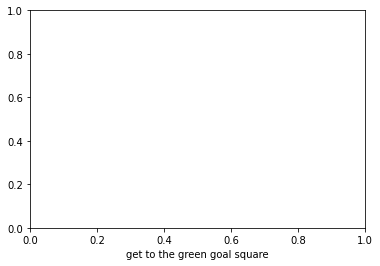

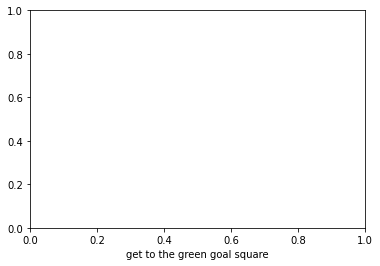

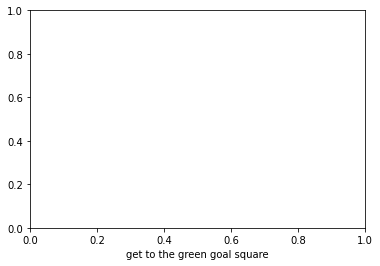

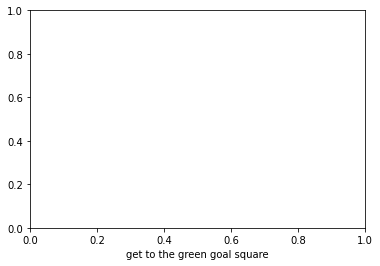

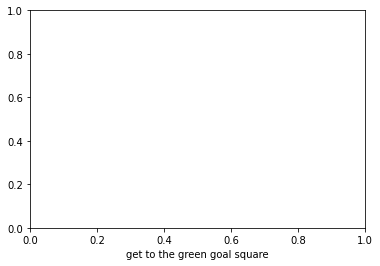

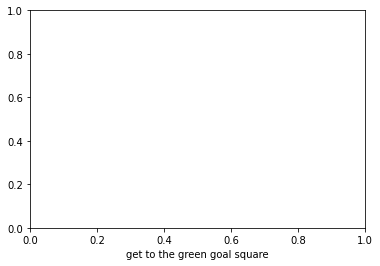

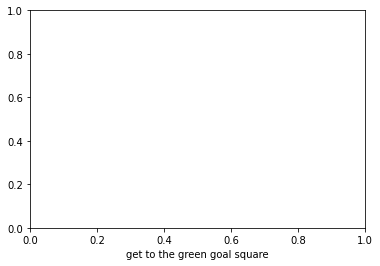

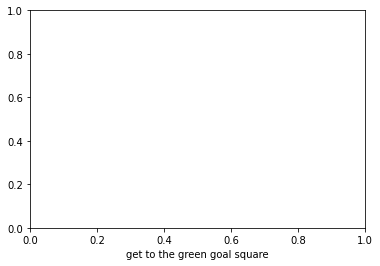

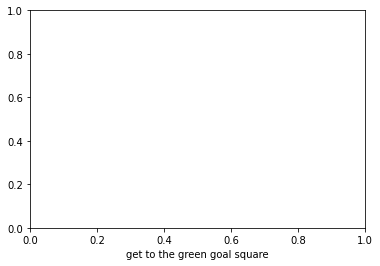

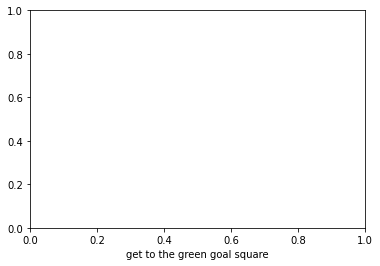

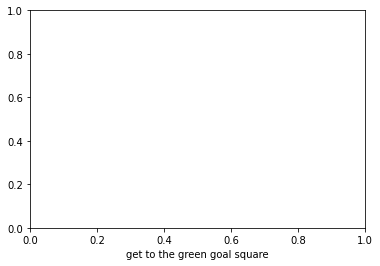

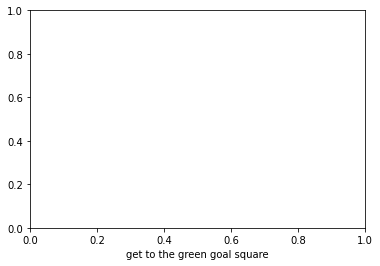

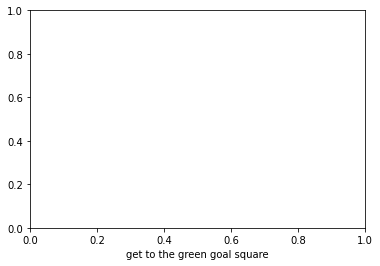

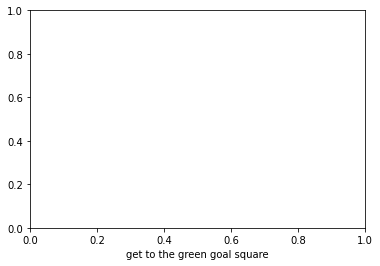

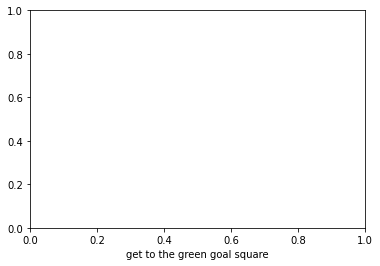

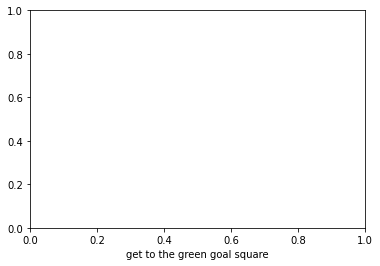

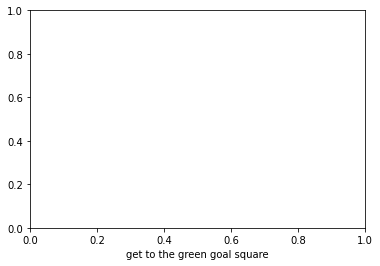

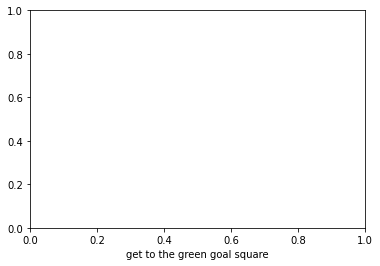

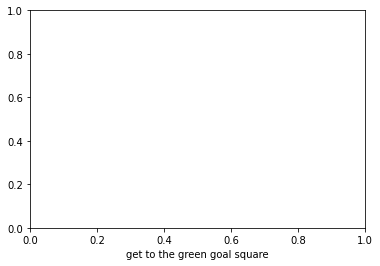

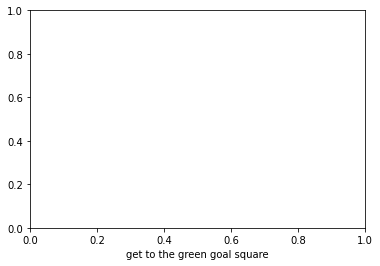

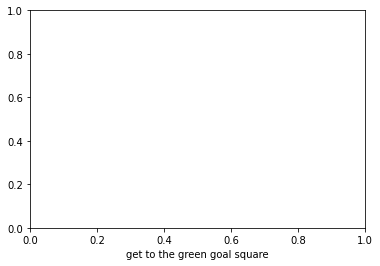

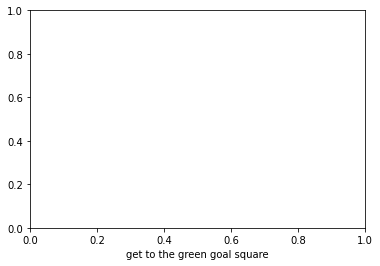

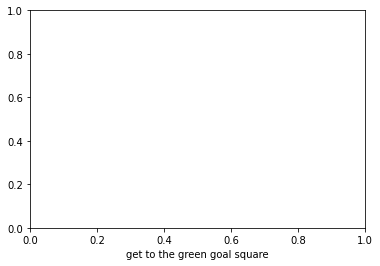

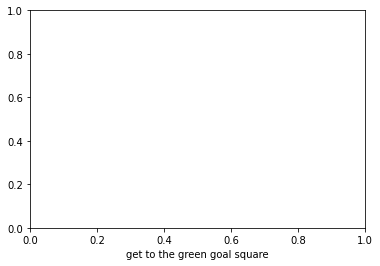

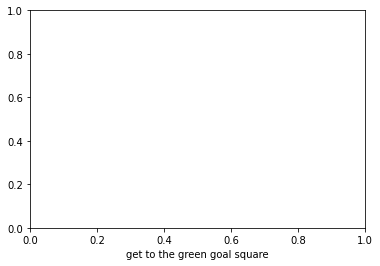

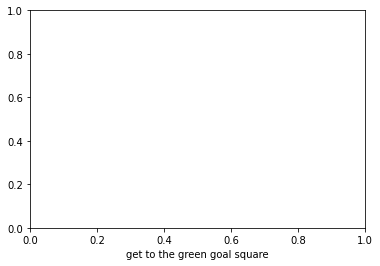

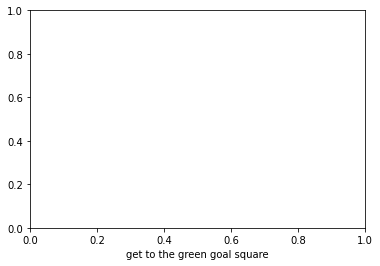

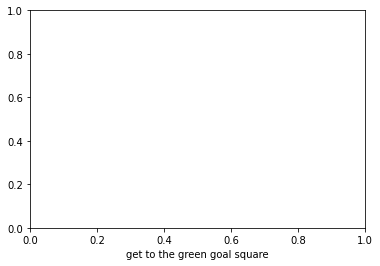

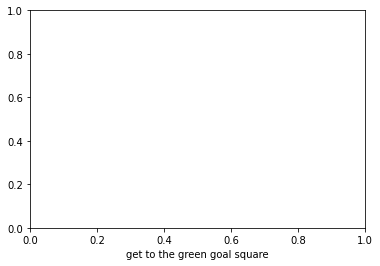

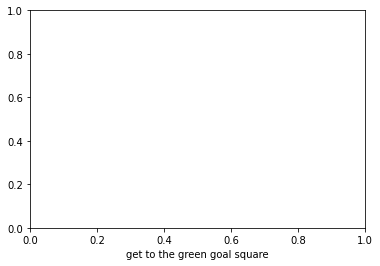

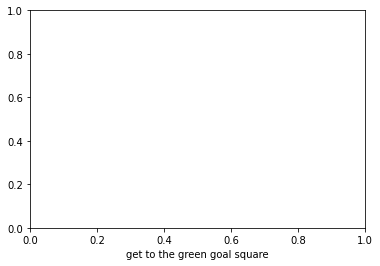

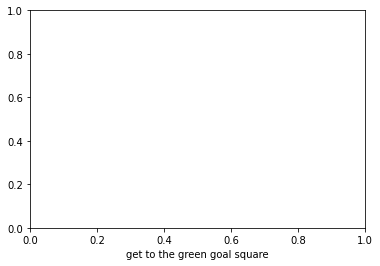

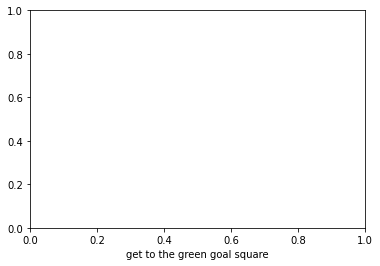

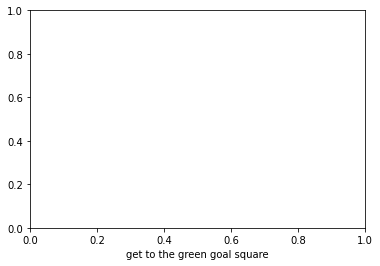

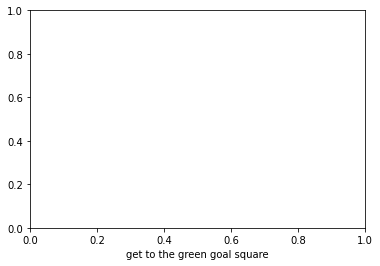

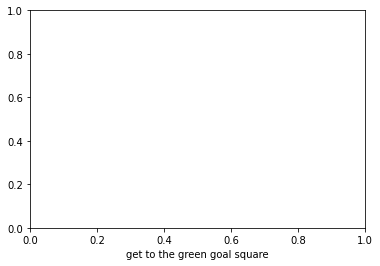

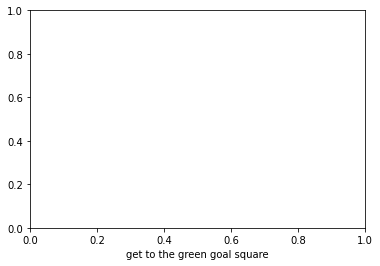

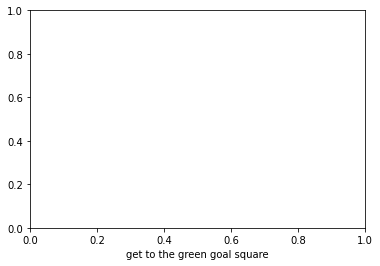

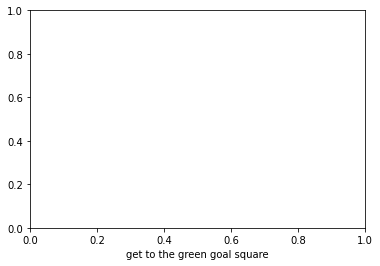

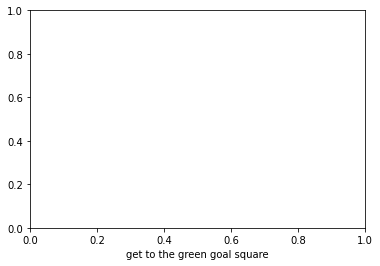

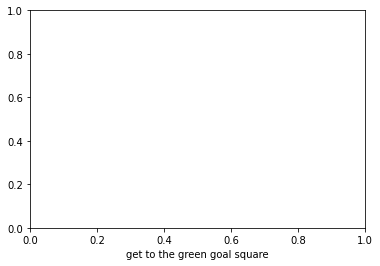

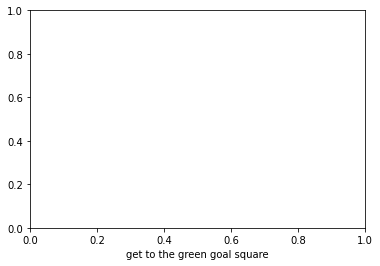

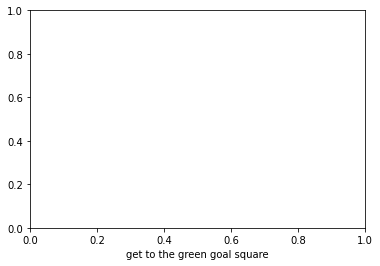

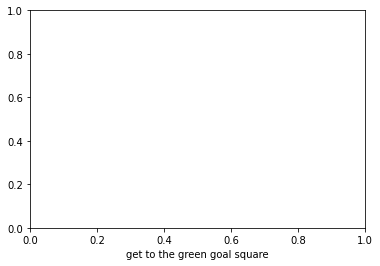

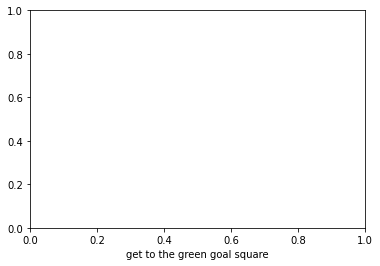

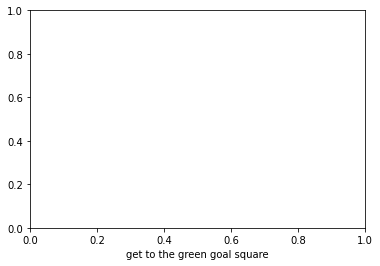

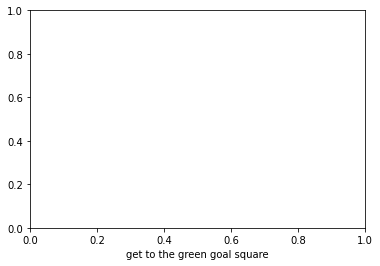

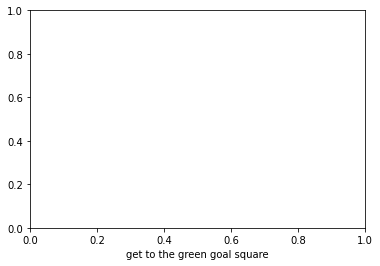

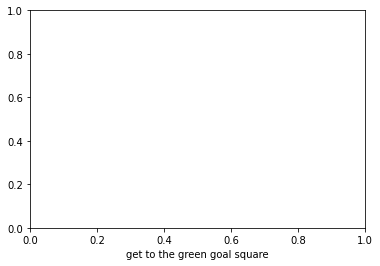

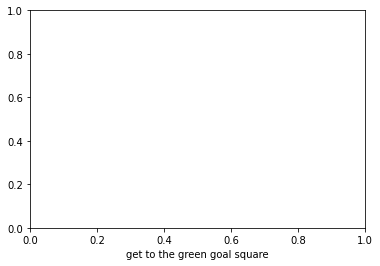

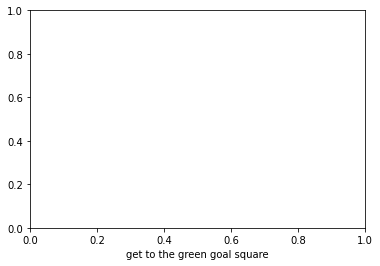

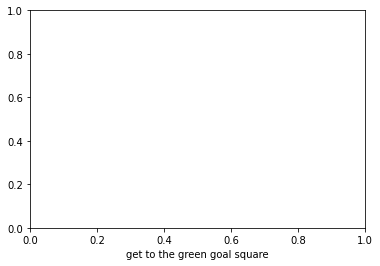

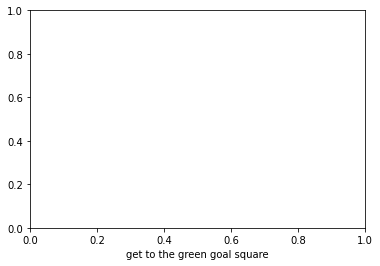

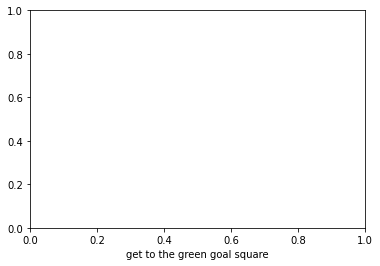

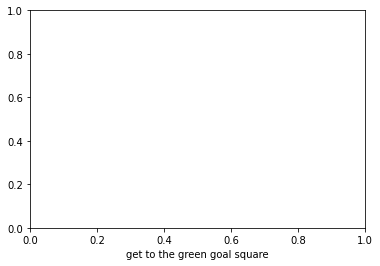

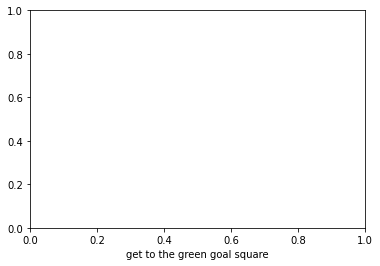

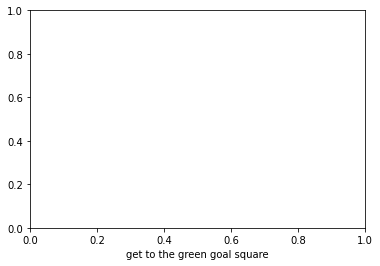

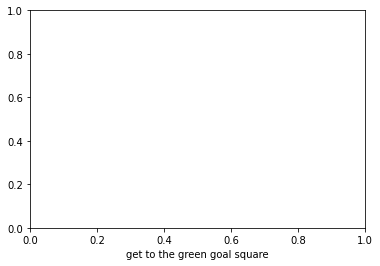

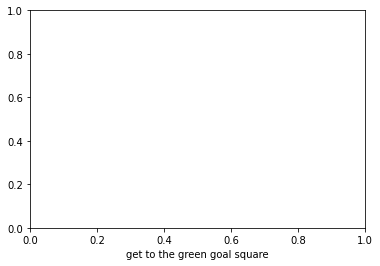

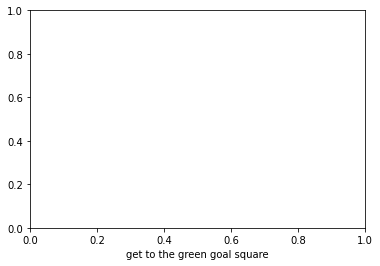

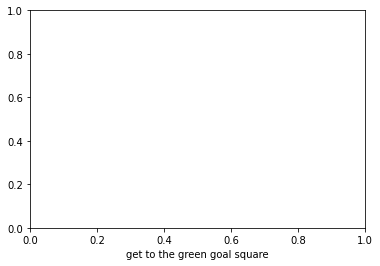

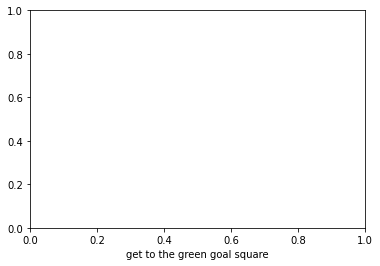

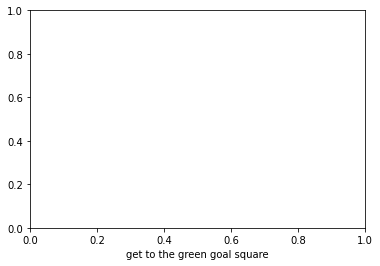

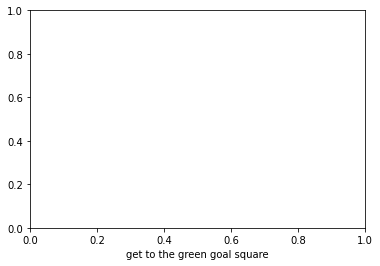

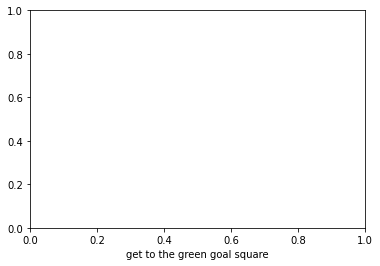

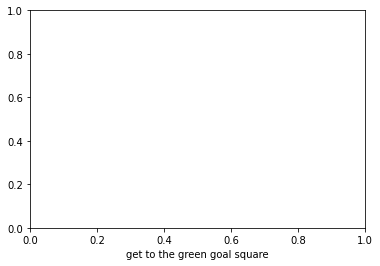

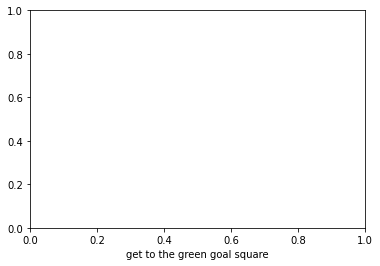

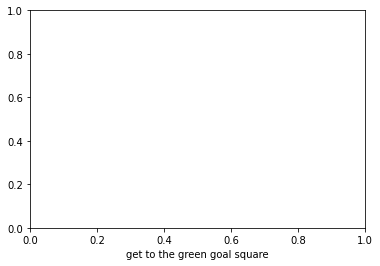

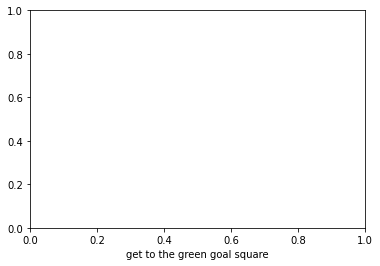

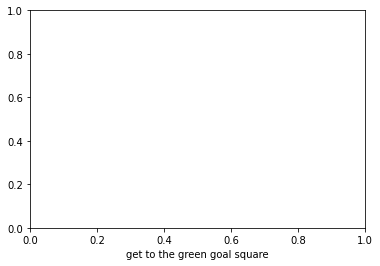

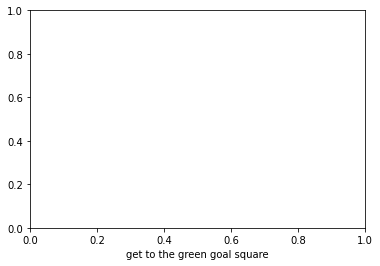

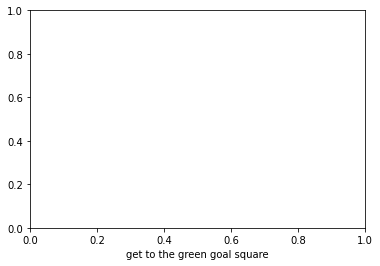

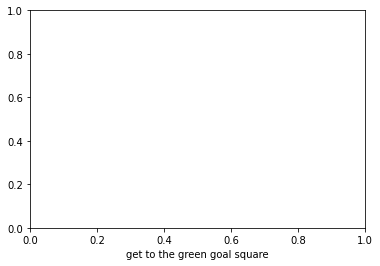

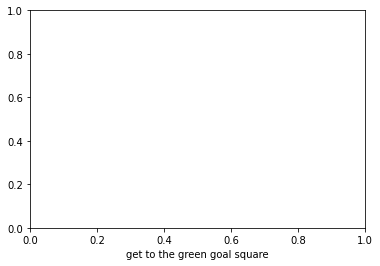

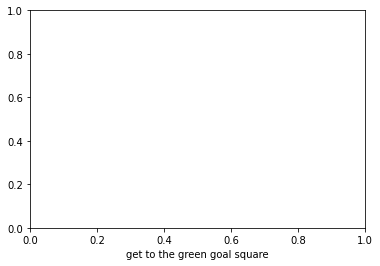

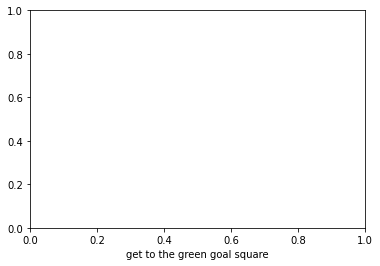

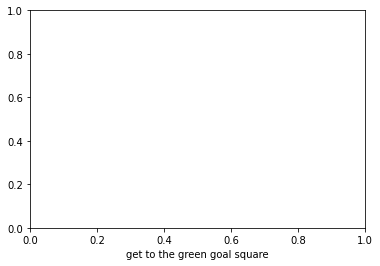

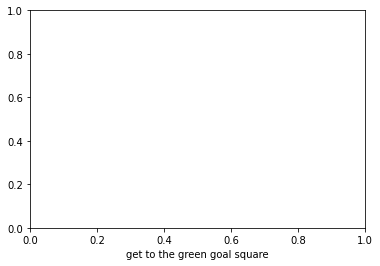

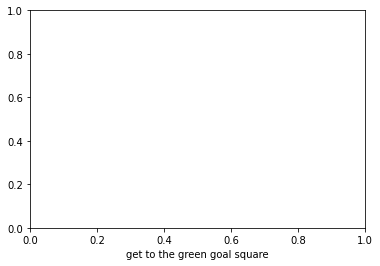

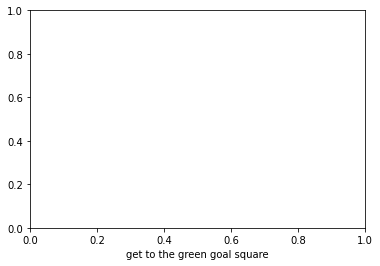

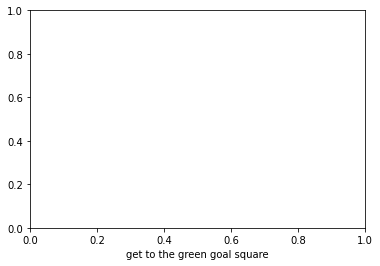

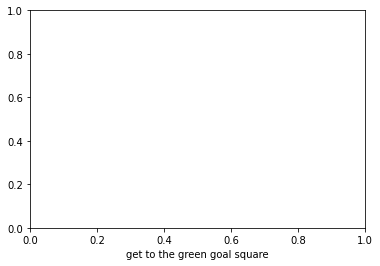

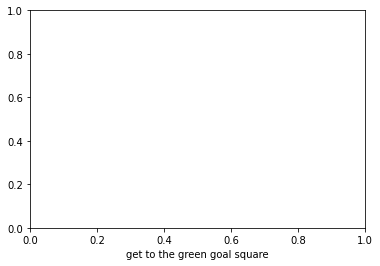

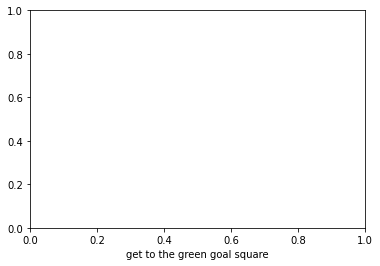

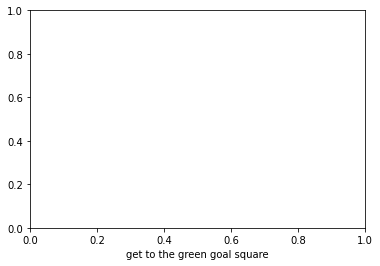

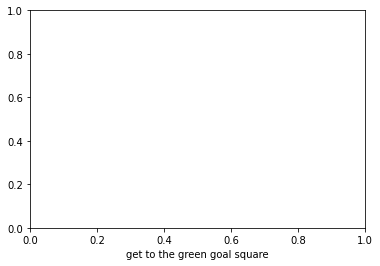

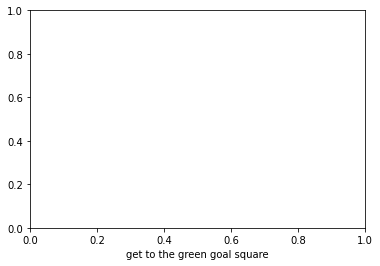

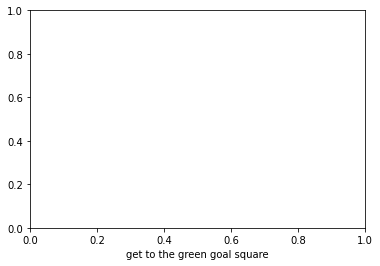

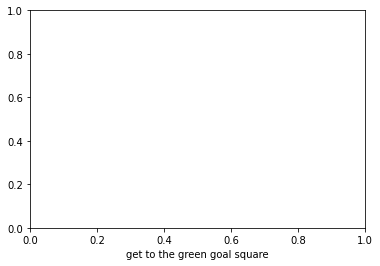

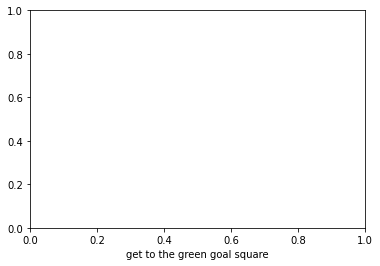

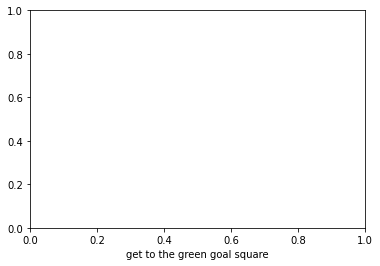

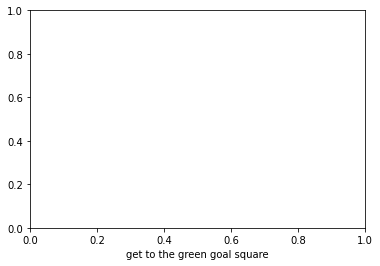

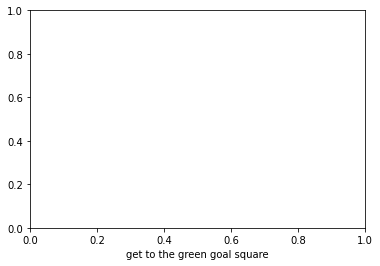

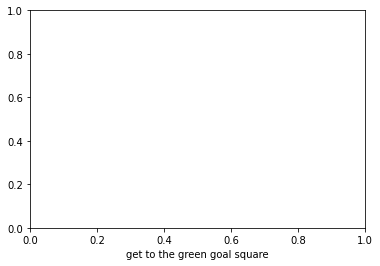

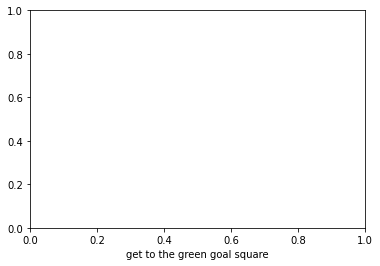

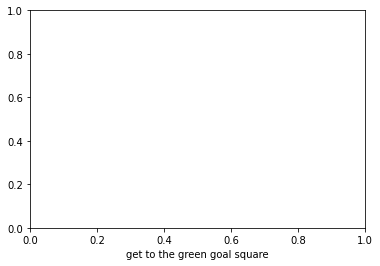

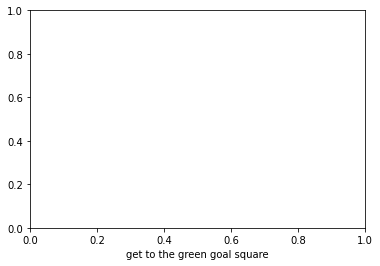

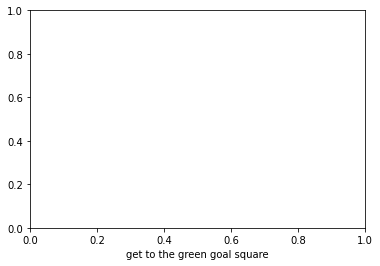

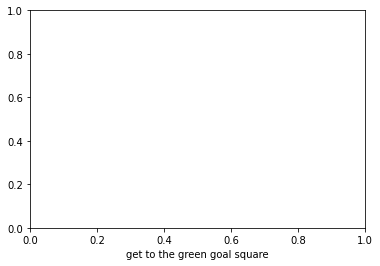

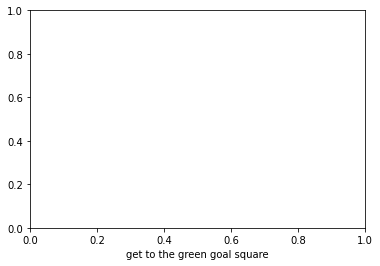

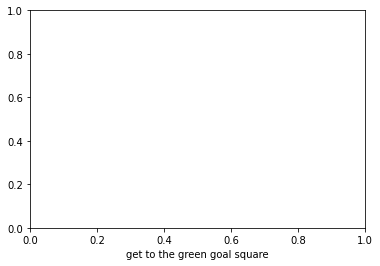

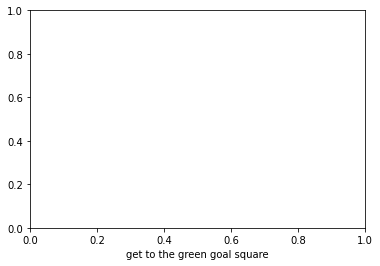

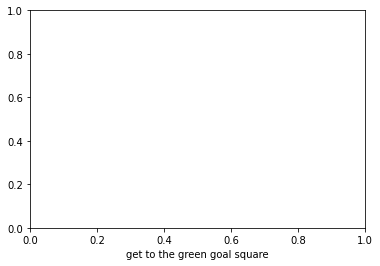

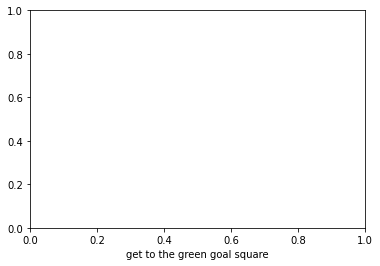

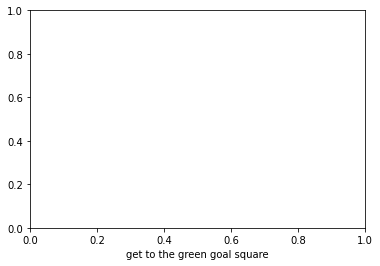

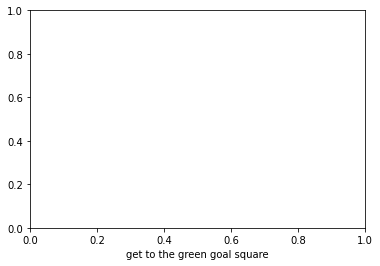

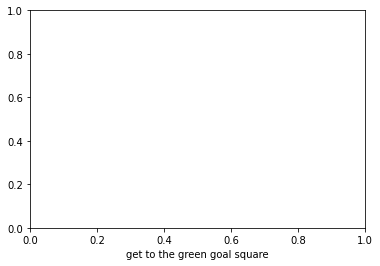

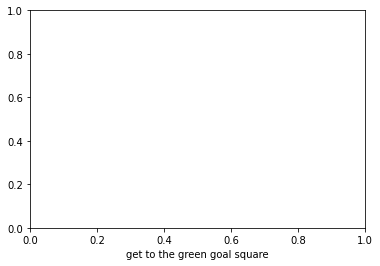

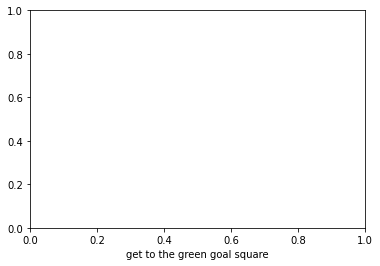

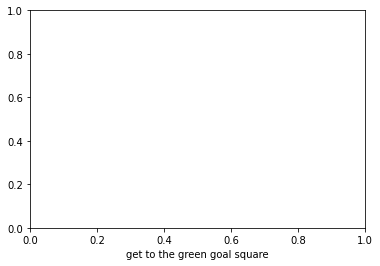

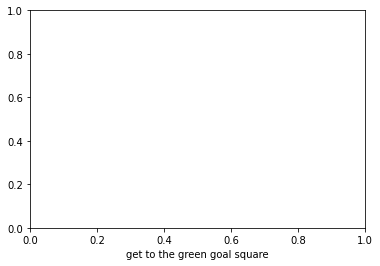

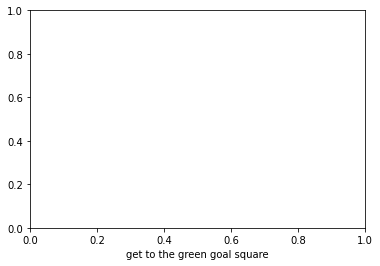

Saving gif... Done.


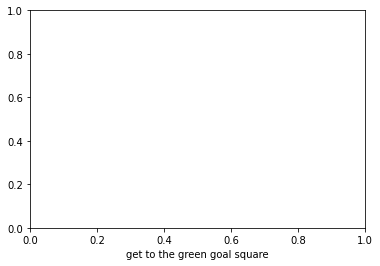

In [14]:
# Set seed for all randomness sources

# utils.seed(args.seed)

# Set device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}\n")

# Load environment

env = utils.make_env(env_s)
env = FullyObsWrapper(env)
for _ in range(shift):
    env.reset()
print("Environment loaded\n")

# Load agent

model_dir = utils.get_model_dir(model_s)
print("model dir = " + str(model_dir))
agent = utils.Agent(env.observation_space, env.action_space, model_dir, device=device, argmax=False, use_memory=False, use_text=False)
print("Agent loaded\n")

# Run the agent

if gif:
   from array2gif import write_gif
   frames = []

# Create a window to view the environment
env.render('human')

for episode in range(episodes):
    obs = env.reset()

    while True:
        env.render('human')
        if gif:
            frames.append(numpy.moveaxis(env.render("rgb_array"), 2, 0))

        action = agent.get_action(obs)
        obs, reward, done, _ = env.step(action)
        agent.analyze_feedback(reward, done)

        if done or env.window.closed:
            break

    if env.window.closed:
        break

if gif:
    print("Saving gif... ", end="")
    write_gif(numpy.array(frames), gif+".gif", fps=1/pause)
    print("Done.")


In [4]:
%load_ext tensorboard

![SegmentLocal](test.gif "segment")

In [10]:
# logdir = 'storage/Empty' 
%tensorboard --logsdir='storage/Empty' logs --debug

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2020-10-31 02:34:27.218919: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2020-10-31 02:34:27.219003: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--purge_orphaned_data BOOL] [--db URI] [--db_import]
                   [--inspect] [--version_tb] [--tag TAG] [--event_file PATH]
                   [--path_prefix PATH] [--window_title TEXT]
                   [--max_reload_threads COUNT] [--reload_interval SECONDS]
                   [--reload_task TYPE] [--reload_multifile BOOL]
                   [--reload_multifile_inacti

In [9]:
import tensorflow as tf
print(tf.__version__)


2.3.1
